In [510]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [511]:
import numpy as np
import pandas as pd
import datetime as dt
import time
from datetime import datetime
import ast
from datetime import date
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [512]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import func

In [513]:
# create engine to hawaii.sqlite
# engine = create_engine("sqlite:///hawaii.sqlite") - CP Comment, didn't work so modified to the code below
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [514]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()` - CP Add
Base = automap_base()

# reflect the tables
# Use the Base class to reflect the database tables - CP Add
Base.prepare(engine, reflect=True)

In [515]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base - CP Add
Base.classes.keys()

['measurement', 'station']

In [516]:
# Save references to each table
# Assign the measurement and station class to variables called 'measurement' and 'station' - CP Add
measurement = Base.classes.measurement
station = Base.classes.station

In [517]:
# Create our session (link) from Python to the DB
# Create a session - CP Add
session = Session(engine)

In [518]:
# Display the row's columns and data in dictionary format for measurement - CP Add
first_row_m = session.query(measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1339e7ec700>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [519]:
# Display the row's columns and data in dictionary format for station - CP Add
first_row_s = session.query(station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1339e51fee0>,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'id': 1,
 'longitude': -157.8168}

In [520]:
#As an alternative, display measurement as a pandas dataframe - CP ADD
conn = engine.connect()
data_m = pd.read_sql("select * FROM measurement", conn)
data_m.head(3)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0


In [521]:
#As an alternative, Display station as a pandas dataframe - CP ADD
conn = engine.connect()
data_m = pd.read_sql("select * FROM station", conn)
data_m.head(3)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0


# Exploratory Precipitation Analysis

In [522]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23')

In [523]:
#Define Start date for the 12 months of data as being the most recent date - 365 days 
#Result is a tuple. To get just the date, use index [0]
mst_recent_dt= session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
dt_obj = datetime.strptime(mst_recent_dt, "%Y-%m-%d") 
start_dte = dt_obj - timedelta(days=365)

print (start_dte)

2016-08-23 00:00:00


In [524]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data


#run as session query filtering on the prior year and capture the results as a dataframe
Precip_data_df = pd.read_sql(session.query(measurement.date,measurement.prcp).\
                             filter(measurement.date > start_dte).\
                             order_by(measurement.date).\
                             statement,session.bind)

In [525]:
#Convert the date field to "date" format
Precip_data_df['date'] = pd.to_datetime(Precip_data_df['date'])

In [526]:
#Drop Index counter column and set index to the "date" column
Precip_data_df.set_index('date' , inplace=True) 
Precip_data_df

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


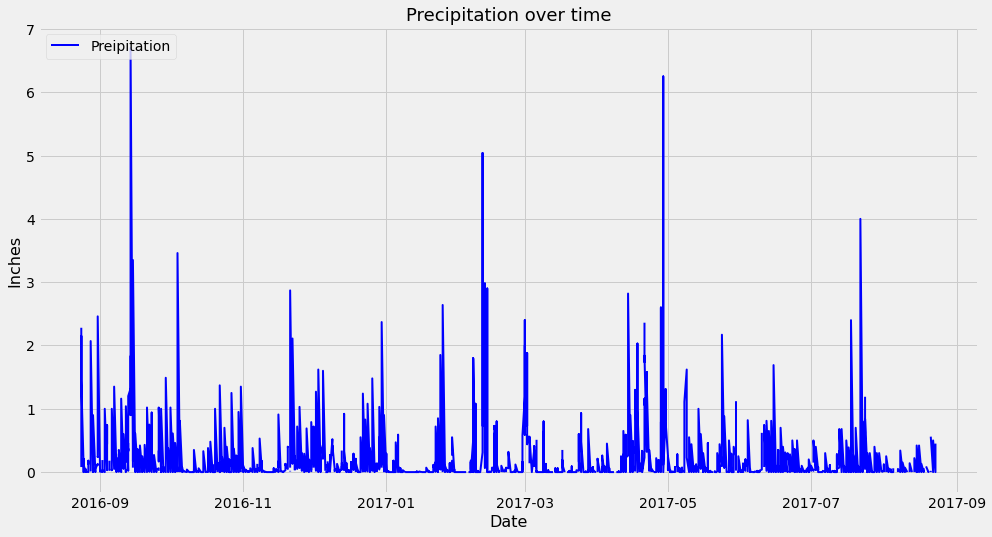

In [527]:
#Plot the precipitation data results over time

#Charactorize figure size/layout                       
fig = plt.figure(figsize=(15, 8))

#Build and format plot
ax1 = fig.add_subplot(111)
ax1.plot(Precip_data_df, linewidth=2, markersize=12, color="blue", label = "Preipitation")
plt.xlabel('Date',fontsize =16)
plt.ylabel('Inches',fontsize =16)
plt.legend(loc='upper left')

#define title and Lable axis
plt.title('Precipitation over time',fontsize =18)


plt.savefig("precipitation_over_time", bbox_inches = "tight")

plt.show()



In [528]:
# Calculate the date one year from the last date in data set.

#Define Start date for the 12 months of data as being the most recent date 1 plus 365 days 
#Result is a tuple. To get just the date, use index [0]
mst_recent_dt= session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
dt_obj = datetime.strptime(mst_recent_dt, "%Y-%m-%d") 
end_dte = dt_obj + timedelta(days=365)

print (end_dte)

2018-08-23 00:00:00


In [489]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# CP note to grader. It appears the image of the summary statistics provided with our homework file is including the 6 data
# points on 2016-08-23. This would be tabulating results for 1 year + 1 day. It doesn't alter any of the summary statistics 
# in any material way. I just opted to keep my results as the 365 day range resulting from date > 2016-08-23 with a last 
# recorded date of 2017-08-23

Precip_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [490]:
# Design a query to calculate the total number stations in the dataset

station_count = session.query(station).count()
print(station_count)

9


In [491]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_count_readings = pd.read_sql(session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).\
statement,session.bind)
station_count_readings

,station,count_1
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [492]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#Highest Temperature
High = session.query(measurement.tobs).order_by(measurement.tobs.desc()).\
filter(measurement.station == 'USC00519281').first()
print (f'The highest temperature at station USC00519281 is {High}')

#Lowest Temperature
Low = session.query(measurement.tobs).order_by(measurement.tobs).\
filter(measurement.station == 'USC00519281').first()
print (f'The lowest temperature at station USC00519281 is {Low}')

Avg = session.query(func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').first()
print (f'The average temperature at station USC00519281 is {Avg}')

The highest temperature at station USC00519281 is (85.0,)
The lowest temperature at station USC00519281 is (54.0,)
The average temperature at station USC00519281 is (71.66378066378067,)


In [501]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Part 1 -run as session query filtering on the prior year and capture the results as a dataframe
temp_data_df = pd.read_sql(session.query(measurement.date,measurement.tobs).\
                             filter(measurement.date > start_dte,measurement.station == 'USC00519281').\
                             order_by(measurement.date).\
                             statement,session.bind)
temp_data_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


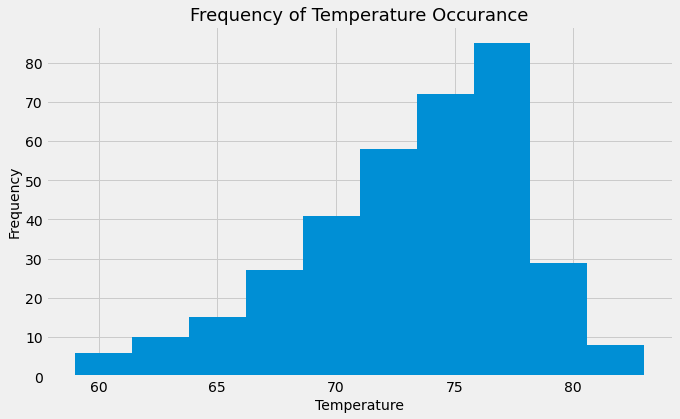

In [529]:
# Part 2. Create a histogram to visualize the temperatures by date ranges.

#Plot histogram
temps = temp_data_df['tobs'].hist(figsize=(10,6))
plt.xlabel('Temperature', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title("Frequency of Temperature Occurance",fontsize = 18)

#Save image for potential reference in the report
plt.savefig("Temperature_Ranges_Frequency.png")

plt.show()


In [508]:
#Prep and test min,avg,max query for climate app section

start_date= "2016-01-01"
end_date="2017-12-31"

# Design a query for the minimum, average, and the max temperature for a given start or start-end range

temperature_ranges = pd.read_sql(session.query(measurement.date, func.min(measurement.tobs),\
                                            func.avg(measurement.tobs),\
                                            func.max(measurement.tobs),).\
                                            group_by(measurement.date).\
                                            filter(measurement.date >= start_date,measurement.date <= end_date).\
                                            statement,session.bind)
temperature_ranges



,date,min_1,avg_1,max_1
0,2016-01-01,62.0,68.166667,74.0
1,2016-01-02,69.0,71.833333,73.0
2,2016-01-03,63.0,68.500000,75.0
3,2016-01-04,62.0,69.500000,76.0
4,2016-01-05,68.0,70.666667,75.0
...,...,...,...,...
596,2017-08-19,71.0,78.750000,85.0
597,2017-08-20,78.0,79.666667,81.0
598,2017-08-21,76.0,79.500000,82.0
599,2017-08-22,76.0,80.000000,82.0


# Close session

In [509]:
# Close Session
session.close()